# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [129]:
df = pd.read_json('C:\\Users\\jltsa\\Desktop\\DataScience\\challenge1\\logins.json')

In [36]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [37]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


## Aggregate login counts in 15 min intervals for a day

In [39]:
#convert timestamp to string to pull out date
df['date_str'] = df['login_time'].apply(lambda x: str(x))

In [40]:
#create column just for date
df['date'] = df['date_str'].apply(lambda x: x[:10])

In [41]:
#create column just for time
df['time'] = df['date_str'].apply(lambda x: x[11:])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 4 columns):
login_time    93142 non-null datetime64[ns]
date_str      93142 non-null object
date          93142 non-null object
time          93142 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


In [43]:
df['times'] = df['time'].apply(lambda x: pd.to_datetime(x))

In [44]:
#add columns for logins
df['logins'] = 1

In [45]:
#set index to the times all on the same date so we can aggregate by day
df = df.set_index('times')

In [46]:
#drop columns
df.drop(['login_time', 'date_str', 'date', 'time'], axis=1, inplace=True)

In [47]:
#Group by 15 mins intervals
df_group = df.resample('15T').count()
df_group.head()


,logins
times,
2019-05-11 00:00:00,1439
2019-05-11 00:15:00,1547
2019-05-11 00:30:00,1525
2019-05-11 00:45:00,1482
2019-05-11 01:00:00,1549


In [31]:
df_group.tail()

,logins
times,
2019-05-11 22:45:00,1637
2019-05-11 23:00:00,1573
2019-05-11 23:15:00,1552
2019-05-11 23:30:00,1456
2019-05-11 23:45:00,1477


## Logins in 15 minute intervals - with dates

In [16]:
df2 = pd.read_json('C:\\Users\\jltsa\\Desktop\\DataScience\\challenge1\\logins.json')

In [17]:
df2 = df2.set_index('login_time')

In [18]:
df2['logins'] = 1

In [29]:
df2_grouped = df2.resample('15T').count().head()

In [30]:
df2_grouped.describe()

,logins
count,5.000000
mean,5.000000
std,3.391165
min,1.000000
25%,2.000000
50%,6.000000
75%,7.000000
max,9.000000


## View login frequencies on a daily basis

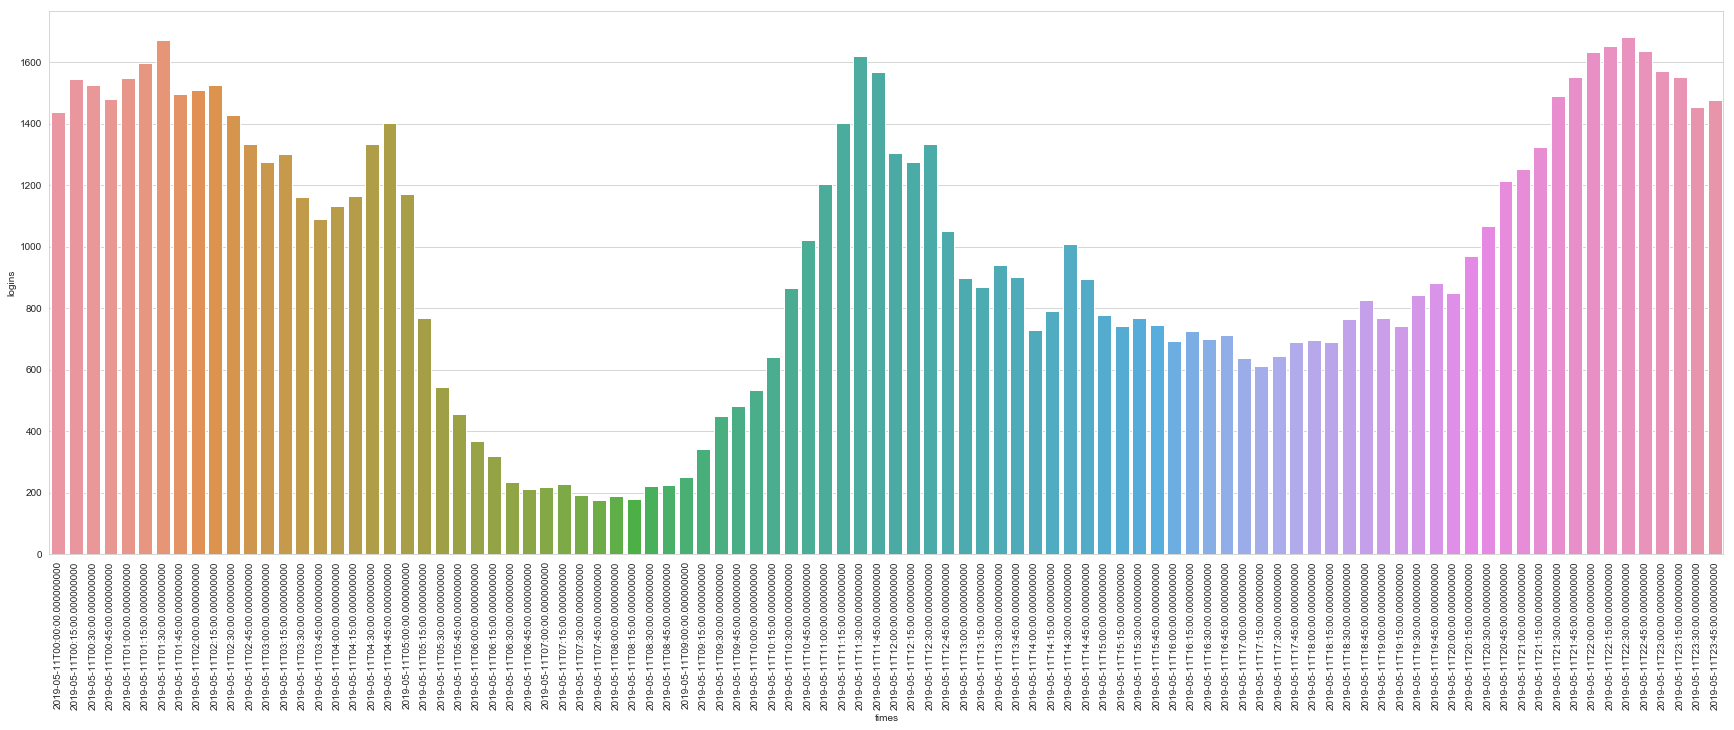

In [21]:
sn.set_style("whitegrid")
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sn.barplot(df_group.index, df_group.logins)

In [25]:
df_group.describe()

,logins
count,96.000000
mean,970.229167
std,455.485640
min,175.000000
25%,690.750000
50%,899.500000
75%,1404.000000
max,1684.000000


## Login Anaylsis

We can see there are 2 peak login times.  The first peak time around 10:30am and maxes out around 11:30. Logins start to drop off around 1PM and then there is steady traffic.  The next peak login in time starts around 8PM and peaks around 10PM to about 1:45AM in the morning.  Logins really start to fall off at 4AM, and reaches the lowest amounts of logins around 4:30AM to about 9:15AM.

The data is taken over the time interval of Jan-1-1970 to May-11-1970 which is 131 days.

### Peak logins from 10:30am to 11:30am per day on average

In [75]:
df_group.iloc[42:47, :]/131

,logins
times,
2019-05-11 10:30:00,6.618321
2019-05-11 10:45:00,7.801527
2019-05-11 11:00:00,9.183206
2019-05-11 11:15:00,10.717557
2019-05-11 11:30:00,12.381679


In [79]:
#avg
print(df_group.iloc[42:47, :]['logins'].mean()/131)

#max
print(df_group.iloc[42:47, :]['logins'].max()/131)

9.340458015267174
12.381679389312977


### Peak logins from 8:00pm to 1:45am per day on average

In [114]:
peak2 = pd.concat([df_group.iloc[80:, :], df_group.iloc[:8, :]])/131
peak2

,logins
times,
2019-05-11 20:00:00,6.480916
2019-05-11 20:15:00,7.404580
2019-05-11 20:30:00,8.160305
2019-05-11 20:45:00,9.274809
2019-05-11 21:00:00,9.557252
2019-05-11 21:15:00,10.114504
2019-05-11 21:30:00,11.389313
2019-05-11 21:45:00,11.862595
2019-05-11 22:00:00,12.473282


In [111]:
#avg
print(peak2['logins'].mean())
#max
print(peak2['logins'].max())

11.037213740458016
12.854961832061068


### Lowest logins from 4:30am to about 9:15am per day on average

In [124]:
low = df_group.iloc[18:38, :]/131
low

,logins
times,
2019-05-11 04:30:00,10.183206
2019-05-11 04:45:00,10.717557
2019-05-11 05:00:00,8.954198
2019-05-11 05:15:00,5.877863
2019-05-11 05:30:00,4.160305
2019-05-11 05:45:00,3.488550
2019-05-11 06:00:00,2.816794
2019-05-11 06:15:00,2.442748
2019-05-11 06:30:00,1.793893


In [125]:
#avg
print(low['logins'].mean())
#min
print(low['logins'].min())

3.45381679389313
1.3358778625954197


# Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

One metric could be the average number of rides per day which had a toll paid.

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
    
a. how you will implement the experiment

Extract ride data on the dates when tolls were reimbursed versus the past data where rides were not reimbursed.  Find the average number of rides per days and see and see if the means is different.  You can further break this down in time periods of busy hours for each company.

b. what statistical test(s) you will conduct to verify the significance of the
observation?

We can perform a t-test to compare the average number of rides per day for periods where the tolls were reimbursed versus those that were not.

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats?

We can see if there is a statistical difference based on the p-value of the t-tests.  If there is a statistical difference showing that there was more rides when tolls were reimbursed, we can then then look at the financial records between periods with tolls reimbursed.  If the profit in the periods with tolls reimbursed is higher even after reimbursing tolls, then we can recommond that the experiment was a success and continue.  However, if the profits are lower even though the number rides increased after toll reimbursement then we can recommend to stop reimbursing tolls. Other recommendations may be to find a sweet sport in have toll stipend or partial reimbursement.

# Predictive Modeling

In [137]:
import json
with open('C:\\Users\\jltsa\\Desktop\\DataScience\\challenge1\\ultimate_data_challenge.json') as file:
    data = json.load(file)

In [139]:
udf = pd.DataFrame(data)

In [141]:
udf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [283]:
udf.city.describe()

count          41744
unique             3
top       Winterfell
freq           19315
Name: city, dtype: object

In [289]:
udf.signup_date.describe()

count          41744
unique            31
top       2014-01-18
freq            2491
Name: signup_date, dtype: object

In [142]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We can see there is already some null values

### Take a look at what some of these null values look like

In [148]:
udf[udf.avg_rating_by_driver.isnull()].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
90,6.28,NaN,5.0,1.0,Winterfell,2014-02-09,iPhone,2014-01-10,0.0,1,False,0.0
274,6.00,NaN,2.0,4.0,Astapor,2014-02-09,iPhone,2014-01-25,100.0,1,False,0.0
277,1.82,NaN,NaN,1.0,Winterfell,2014-01-26,iPhone,2014-01-25,0.0,1,False,0.0
536,1.41,NaN,5.0,1.0,Winterfell,2014-02-08,Android,2014-01-18,0.0,1,False,100.0
857,0.42,NaN,4.0,1.0,Winterfell,2014-03-16,iPhone,2014-01-11,0.0,0,False,0.0


Entries for avg_rating_by_driver and avg_rating_of_driver which have null values should be removed for machine learning, where we decide to use those features.

In [147]:
udf[udf.phone.isnull()].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
134,2.88,5.0,5.0,1.00,King's Landing,2014-06-11,None,2014-01-10,0.0,0,False,100.0
176,20.32,5.0,5.0,1.00,Astapor,2014-03-18,None,2014-01-28,0.0,0,False,100.0
320,31.01,5.0,5.0,1.00,Astapor,2014-01-09,None,2014-01-08,0.0,1,False,100.0
349,6.03,5.0,3.3,1.00,Winterfell,2014-06-22,None,2014-01-06,0.0,1,True,33.3
389,3.08,4.8,4.9,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7


We will keep the entries where phone is null because I don't see having an entry where phone number is null will have too much of an affect on any analysis as of right now.

### Adding customer retained feature

In [153]:
#define fuction to input a val of 'Yes' if customer had
#a trip within 30 days of signing up

def retained(row):
    if row['trips_in_first_30_days'] > 0:
        val = "Yes"
    else:
        val = "No"
    return val

In [154]:
udf['Retained'] = udf.apply(retained, axis=1)

In [156]:
udf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,Yes
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,No
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,Yes
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,Yes
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,Yes


### Drop rows where the 'avg_rating_by_driver', 'avg_rating_of_driver' are null

In [207]:
udf.dropna(subset=['avg_rating_by_driver', 'avg_rating_of_driver'], inplace=True)

### Add bad to good feature for ratings

In [256]:
udf['avg_rating_by_driver'].describe()

count    41744.000000
mean         4.776648
std          0.404109
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [263]:
def good_bad_category(row):
    if row['avg_rating_by_driver'] == 5:
        val = '5 stars'
    elif row['avg_rating_by_driver'] < 5 and row['avg_rating_by_driver'] >= 4:
        val = '4 stars'
    elif row['avg_rating_by_driver'] < 4 and row['avg_rating_by_driver'] >= 3:
        val = '3 stars'
    elif row['avg_rating_by_driver'] < 3 and row['avg_rating_by_driver'] >= 2:
        val = '2 stars'
    else:
        val = '1 star'
    return val

In [264]:
udf['avg_rating_by_driver_cat'] = udf.apply(good_bad_category, axis=1)

In [266]:
def good_bad_category2(row):
    if row['avg_rating_of_driver'] == 5:
        val = '5 stars'
    elif row['avg_rating_of_driver'] < 5 and row['avg_rating_of_driver'] >= 4:
        val = '4 stars'
    elif row['avg_rating_of_driver'] < 4 and row['avg_rating_of_driver'] >= 3:
        val = '3 stars'
    elif row['avg_rating_of_driver'] < 3 and row['avg_rating_of_driver'] >= 2:
        val = '2 stars'
    else:
        val = '1 star'
    return val

In [267]:
udf['avg_rating_of_driver_cat'] = udf.apply(good_bad_category2, axis=1)

In [268]:
udf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Retained,avg_rating_by_driver_cat,avg_rating_of_driver_cat
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,Yes,5 stars,4 stars
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,No,5 stars,5 stars
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,Yes,5 stars,4 stars
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,Yes,4 stars,4 stars
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,Yes,4 stars,4 stars


### Visualizing Data

In [227]:
retained_phone = udf.groupby(['Retained', 'phone']).count()
retained_phone

avg_dist  avg_rating_by_driver  avg_rating_of_driver  \
Retained phone                                                           
No       Android      3380                  3380                  3380   
         iPhone       8144                  8144                  8144   
Yes      Android      8713                  8713                  8713   
         iPhone      21208                 21208                 21208   

                  avg_surge   city  last_trip_date  signup_date  surge_pct  \
Retained phone                                                               
No       Android       3380   3380            3380         3380       3380   
         iPhone        8144   8144            8144         8144       8144   
Yes      Android       8713   8713            8713         8713       8713   
         iPhone       21208  21208           21208        21208      21208   

                  trips_in_first_30_days  ultimate_black_user  weekday_pct  
Retained phone                                                              
No       Android                    3380                 3380         3380  
         iPhone                     8144                 8144         8144  
Yes      Android                    8713                 8713         8713  
         iPhone                    21208                21208        21208

In [228]:
retained_phone = retained_phone.reset_index()
retained_phone

,Retained,phone,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,No,Android,3380,3380,3380,3380,3380,3380,3380,3380,3380,3380,3380
1,No,iPhone,8144,8144,8144,8144,8144,8144,8144,8144,8144,8144,8144
2,Yes,Android,8713,8713,8713,8713,8713,8713,8713,8713,8713,8713,8713
3,Yes,iPhone,21208,21208,21208,21208,21208,21208,21208,21208,21208,21208,21208


[Text(0.5, 0, 'count'), Text(0.5, 1.0, 'Retained Users by Phone')]

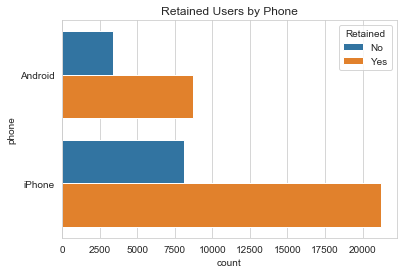

In [229]:
ax = sn.barplot(data=retained_phone, x='city', y='phone', hue='Retained')
ax.set(xlabel='count', title='Retained Users by Phone')

In [252]:
retained_ult = udf.groupby(['Retained', 'ultimate_black_user']).count()
retained_ult = retained_ult.reset_index()
retained_ult['ultimate_black_user'] = np.where(retained_ult['ultimate_black_user']==False, 'False', 'True')
retained_ult['ultimate_black_user'] = np.where(retained_ult['ultimate_black_user']==False, 'False', 'True')

In [253]:
retained_ult

,Retained,ultimate_black_user,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,weekday_pct
0,No,False,7424,7424,7424,7424,7424,7424,7382,7424,7424,7424,7424
1,No,True,4162,4162,4162,4162,4162,4162,4142,4162,4162,4162,4162
2,Yes,False,18223,18223,18223,18223,18223,18223,18144,18223,18223,18223,18223
3,Yes,True,11935,11935,11935,11935,11935,11935,11777,11935,11935,11935,11935


[Text(0.5, 0, 'count'), Text(0.5, 1.0, 'Retained Users by Ult Black Users')]

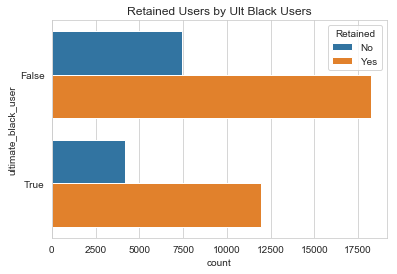

In [254]:
ax = sn.barplot(data=retained_ult, x='city', y='ultimate_black_user', hue='Retained')
ax.set(xlabel='count', title='Retained Users by Ult Black Users')

In [269]:
rate_by_driver = udf.groupby(['Retained', 'avg_rating_by_driver_cat']).count()
rate_by_driver = rate_by_driver.reset_index()
rate_by_driver

,Retained,avg_rating_by_driver_cat,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_of_driver_cat
0,No,1 star,42,42,42,42,42,42,42,42,42,42,42,42,42
1,No,2 stars,33,33,33,33,33,33,33,33,33,33,33,33,33
2,No,3 stars,358,358,358,358,358,358,357,358,358,358,358,358,358
3,No,4 stars,3553,3553,3553,3553,3553,3553,3535,3553,3553,3553,3553,3553,3553
4,No,5 stars,7600,7600,7600,7600,7600,7600,7557,7600,7600,7600,7600,7600,7600
5,Yes,1 star,55,55,55,55,55,55,55,55,55,55,55,55,55
6,Yes,2 stars,73,73,73,73,73,73,73,73,73,73,73,73,73
7,Yes,3 stars,606,606,606,606,606,606,603,606,606,606,606,606,606
8,Yes,4 stars,15262,15262,15262,15262,15262,15262,15141,15262,15262,15262,15262,15262,15262
9,Yes,5 stars,14162,14162,14162,14162,14162,14162,14049,14162,14162,14162,14162,14162,14162


[Text(0.5, 0, 'count'),
 Text(0.5, 1.0, 'Retained Users by avg_rating_by_driver_cat')]

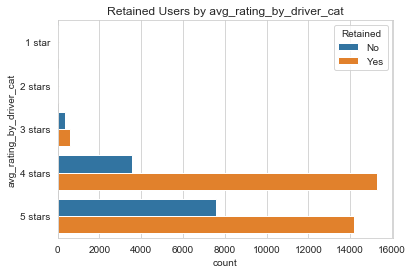

In [271]:
ax = sn.barplot(data=rate_by_driver, x='city', y='avg_rating_by_driver_cat', hue='Retained')
ax.set(xlabel='count', title='Retained Users by avg_rating_by_driver_cat')

In [272]:
rate_of_driver = udf.groupby(['Retained', 'avg_rating_of_driver_cat']).count()
rate_of_driver = rate_of_driver.reset_index()
rate_of_driver

,Retained,avg_rating_of_driver_cat,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_cat
0,No,1 star,96,96,96,96,96,96,95,96,96,96,96,96,96
1,No,2 stars,127,127,127,127,127,127,127,127,127,127,127,127,127
2,No,3 stars,731,731,731,731,731,731,724,731,731,731,731,731,731
3,No,4 stars,3623,3623,3623,3623,3623,3623,3601,3623,3623,3623,3623,3623,3623
4,No,5 stars,7009,7009,7009,7009,7009,7009,6977,7009,7009,7009,7009,7009,7009
5,Yes,1 star,167,167,167,167,167,167,166,167,167,167,167,167,167
6,Yes,2 stars,303,303,303,303,303,303,301,303,303,303,303,303,303
7,Yes,3 stars,2372,2372,2372,2372,2372,2372,2359,2372,2372,2372,2372,2372,2372
8,Yes,4 stars,13651,13651,13651,13651,13651,13651,13543,13651,13651,13651,13651,13651,13651
9,Yes,5 stars,13665,13665,13665,13665,13665,13665,13552,13665,13665,13665,13665,13665,13665


[Text(0.5, 0, 'count'),
 Text(0.5, 1.0, 'Retained Users by avg_rating_of_driver_cat')]

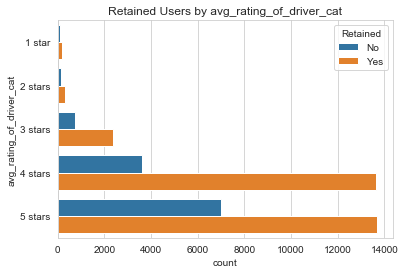

In [273]:
ax = sn.barplot(data=rate_of_driver, x='city', y='avg_rating_of_driver_cat', hue='Retained')
ax.set(xlabel='count', title='Retained Users by avg_rating_of_driver_cat')

In [276]:
retained = udf.groupby(['Retained']).count()
retained

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_cat,avg_rating_of_driver_cat
Retained,,,,,,,,,,,,,,
No,11586,11586,11586,11586,11586,11586,11524,11586,11586,11586,11586,11586,11586,11586
Yes,30158,30158,30158,30158,30158,30158,29921,30158,30158,30158,30158,30158,30158,30158


In [278]:
num_retained = 30158/(11586+30158)

In [279]:
print(f'From the cleaned data, {num_retained}% customers were retained')

From the cleaned data, 0.7224511307014182% customers were retained


In [286]:
#Change 'Retained' column into a binary column for prediction
def retained_num(row):
    if row['Retained'] == 'Yes':
        val = 1
    else:
        val = 0
    return val

In [287]:
udf['Retained'] = udf.apply(retained_num, axis=1)

### Take a look at time intervals

In [380]:
udf.last_trip_date.head()

AttributeError: 'DataFrame' object has no attribute 'last_trip_date'

In [298]:
from datetime import datetime

In [305]:
date_format = '%Y-%m-%d'
a = datetime.strptime(udf.last_trip_date[0], date_format)
b = datetime.strptime(udf.last_trip_date[1], date_format)
delta = a-b
print(delta.days)
print(a)

43
2014-06-17 00:00:00


In [313]:
#Convert dates into date time objects
def make_dt_last_trip(row):
    date_format = '%Y-%m-%d'
    val = datetime.strptime(row['last_trip_date'], date_format)
    return val

def make_dt_signup_date(row):
    date_format = '%Y-%m-%d'
    val = datetime.strptime(row['signup_date'], date_format)
    return val

### Add columns converted to datetime objects

In [308]:
udf['last_trip_datetime'] = udf.apply(make_dt_last_trip, axis=1)

In [314]:
udf['signup_datetime'] = udf.apply(make_dt_signup_date, axis=1)

In [315]:
udf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Retained,avg_rating_by_driver_cat,avg_rating_of_driver_cat,last_trip_datetime,signup_datetime
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,5 stars,4 stars,2014-06-17,2014-01-25
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,5 stars,5 stars,2014-05-05,2014-01-29
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,5 stars,4 stars,2014-01-07,2014-01-06
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,4 stars,4 stars,2014-06-29,2014-01-10
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1,4 stars,4 stars,2014-03-15,2014-01-27


### Add binary column if customer is active after 6 months

In [321]:
def active_six_months(row):
    #150 days is 5 months, if they are active after that then it has been 6 months
    delta = row['last_trip_datetime'] - row['signup_datetime']
    if delta.days > 150:
        return 1
    else:
        return 0

In [322]:
udf['six_months_active'] = udf.apply(active_six_months, axis=1)

In [324]:
udf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Retained,avg_rating_by_driver_cat,avg_rating_of_driver_cat,last_trip_datetime,signup_datetime,six_months_active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,5 stars,4 stars,2014-06-17,2014-01-25,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,5 stars,5 stars,2014-05-05,2014-01-29,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,5 stars,4 stars,2014-01-07,2014-01-06,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,4 stars,4 stars,2014-06-29,2014-01-10,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1,4 stars,4 stars,2014-03-15,2014-01-27,0


In [326]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 18 columns):
avg_dist                    41744 non-null float64
avg_rating_by_driver        41744 non-null float64
avg_rating_of_driver        41744 non-null float64
avg_surge                   41744 non-null float64
city                        41744 non-null object
last_trip_date              41744 non-null object
phone                       41445 non-null object
signup_date                 41744 non-null object
surge_pct                   41744 non-null float64
trips_in_first_30_days      41744 non-null int64
ultimate_black_user         41744 non-null bool
weekday_pct                 41744 non-null float64
Retained                    41744 non-null int64
avg_rating_by_driver_cat    41744 non-null object
avg_rating_of_driver_cat    41744 non-null object
last_trip_datetime          41744 non-null datetime64[ns]
signup_datetime             41744 non-null datetime64[ns]
six_months_active      

# Prepare data for machine learning

In [368]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

### Drop columns not going to be used

In [329]:
udf.drop(['avg_rating_of_driver_cat', 'avg_rating_by_driver_cat','signup_date',
          'last_trip_date', 'last_trip_datetime', 'signup_date'], axis=1, inplace=True)

In [331]:
udf.drop('signup_datetime', axis=1, inplace=True)

In [332]:
udf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Retained,six_months_active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1,0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,1,0


### Grab prediction label

In [333]:
six_months = udf['six_months_active'].values

In [335]:
six_months

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Create dummy variables of category columns

In [337]:
cat_list = ['city', 'phone']

In [338]:
udf = pd.get_dummies(udf, columns=cat_list, drop_first=True)

In [339]:
udf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Retained,six_months_active,city_King's Landing,city_Winterfell,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,1,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,1,1,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,1,0,0,1,0


In [340]:
#drop prediction label
udf.drop('six_months_active', axis=1, inplace=True)

In [341]:
X_train, X_test, y_train, y_test = train_test_split(udf, six_months, test_size=0.2, random_state=42)

## Logistic Regression

In [345]:
#instantiate model
lgc = LogisticRegression()
lgc.fit(X_train, y_train)

C:\Users\jltsa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [346]:
#Accuracy
lgc.score(X_test, y_test)

0.7452389507725476

In [348]:
predict_lgc = lgc.predict(X_test)

In [349]:
print(classification_report(y_test, predict_lgc))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84      6097
           1       0.57      0.22      0.32      2252

   micro avg       0.75      0.75      0.75      8349
   macro avg       0.67      0.58      0.58      8349
weighted avg       0.71      0.75      0.70      8349



In [350]:
y_pred_proba = lgc.predict_proba(X_test)[:,1]

In [351]:
y_pred_proba

array([0.56490217, 0.11719539, 0.79954692, ..., 0.25176671, 0.31618275,
       0.14117506])

In [353]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

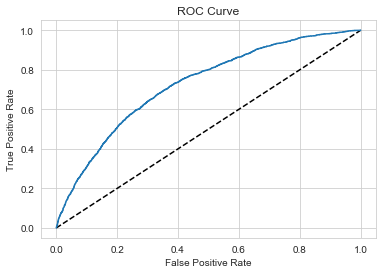

In [354]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Find better hyperparamaters

In [355]:
lg_param_grid = {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                 'penalty': ['l1','l2'],
                 'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1]}


In [358]:
lgc2 = LogisticRegression()
lgc_cv = GridSearchCV(lgc2, lg_param_grid, cv=5)

In [379]:
lgc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [364]:
lgc_cv.score(X_test, y_test)

0.7453587255958798

In [365]:
lgc_cv.best_params_

{'C': 100, 'penalty': 'l1', 'tol': 0.0001}

# Random Forest

In [366]:
rf = RandomForestClassifier()

In [367]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [370]:
rf_rand_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                cv=3, n_iter=10, n_jobs=2, random_state=42)

In [371]:
rf_rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=2,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [372]:
rf_rand_cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [373]:
rf_rand_cv.score(X_test, y_test)

0.7763804048389029

In [374]:
predict_rf = rf_rand_cv.predict(X_test)

In [375]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      6097
           1       0.61      0.47      0.53      2252

   micro avg       0.78      0.78      0.78      8349
   macro avg       0.72      0.68      0.69      8349
weighted avg       0.76      0.78      0.77      8349



In [376]:
y_pred_proba = rf_rand_cv.predict_proba(X_test)[:,1]

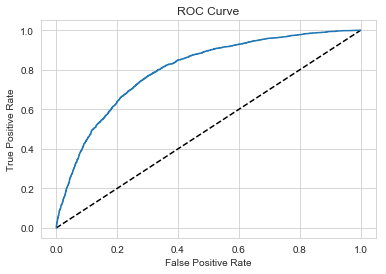

In [377]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [378]:
#AUC score
auc(fpr, tpr)

0.800341307243961

# Model Performace

Random Forest performed slightly better than logistic regression with an accuracy of about 78% and AUC of 80%.

I choose to predict customer activity after 5 months as an indicator of retention in month 6 after signing up.  I did this by finding the difference in the number of days from last active and sign up. If the difference was over 150 (5 months) then that would be a 1 or yes.

We can see that the quality of driver was important and that iphone users had a better retention rate.  The iphone one might lead to better performance from the iphone app than android app.